In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data_df = pd.merge(clinical_trial_df,mouse_df,on='Mouse ID',how='left')

# Display the data table for preview

all_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = all_data_df.groupby(["Drug","Timepoint"]) ["Tumor Volume (mm3)"]
tumor_mean_df = group_df.mean()

# Convert to DataFrame
tumor_mean_df = tumor_mean_df.reset_index()
# Preview DataFrame
tumor_mean_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor = group_df.sem()
# Convert to DataFrame
standard_error_tumor_df = pd.DataFrame(standard_error_tumor)
# Preview DataFrame
standard_error_tumor_df.reset_index()
standard_error_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
rf_tumor_mean_df= tumor_mean_df.pivot(index = "Timepoint", columns = "Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
rf_tumor_mean_df.head()
#.pivot_table(look at the functiont to create the index, columns, and values)
#create new df with only drugs needed 4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


<function matplotlib.pyplot.show(*args, **kw)>

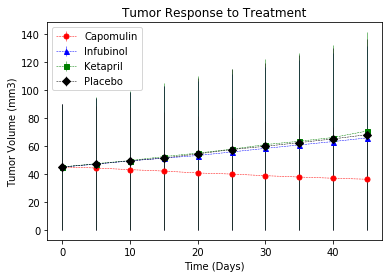

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(rf_tumor_mean_df.index, rf_tumor_mean_df["Capomulin"], 
             yerr=rf_tumor_mean_df["Capomulin"], color = 'r', marker = 'o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(rf_tumor_mean_df.index, rf_tumor_mean_df["Infubinol"], 
             yerr=rf_tumor_mean_df["Infubinol"], color = 'b', marker = '^', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(rf_tumor_mean_df.index, rf_tumor_mean_df["Ketapril"], 
             yerr=rf_tumor_mean_df["Ketapril"], color = 'g', marker = 's', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(rf_tumor_mean_df.index, rf_tumor_mean_df["Placebo"], 
             yerr=rf_tumor_mean_df["Placebo"], color = 'black', marker = 'D', markersize=5, linestyle='--', linewidth=0.5)
x_limit = len(rf_tumor_mean_df.index)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='upper left')
# Save the Figure

plt.show

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_df = all_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_met_df = met_df.mean()
# Convert to DataFrame
mean_met_df = mean_met_df.reset_index()
# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met = met_df.sem()
# Convert to DataFrame
standard_error_met_df = pd.DataFrame(standard_error_met)
# Preview DataFrame
standard_error_met_df.reset_index()
standard_error_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
rf_mean_met_df = mean_met_df.pivot(index = "Timepoint", columns = "Drug", 
                                   values = "Metastatic Sites")
# Preview that Reformatting worked
rf_mean_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


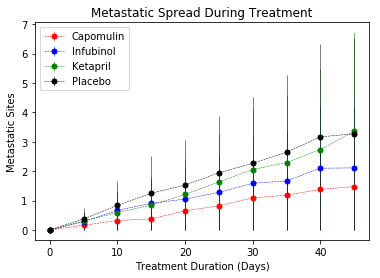

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(rf_mean_met_df.index, rf_mean_met_df['Capomulin'], yerr=rf_mean_met_df['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(rf_mean_met_df.index, rf_mean_met_df['Infubinol'], yerr=rf_mean_met_df['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(rf_mean_met_df.index, rf_mean_met_df['Ketapril'], yerr=rf_mean_met_df['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(rf_mean_met_df.index, rf_mean_met_df['Placebo'], yerr=rf_mean_met_df['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc='upper left')
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = all_data_df.groupby(["Drug", "Timepoint"])["Mouse ID"]
mice_count_df = mice_df.nunique()
mice_count_df = pd.DataFrame(mice_count_df)
# Convert to DataFrame
mice_count_df.reset_index(inplace = True)
mice_count_df = mice_count_df.rename(columns = {"Mouse ID": "Mouse Count"})
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
rf_mice_count_df = mice_count_df.pivot(index = "Timepoint", columns = "Drug", 
                                      values = "Mouse Count")
# Preview the Data Frame
rf_mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


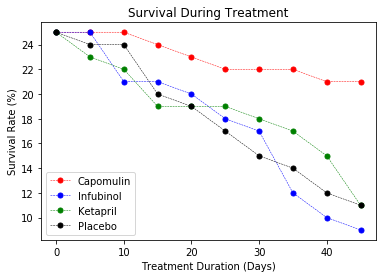

In [12]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(rf_mice_count_df.index, rf_mice_count_df['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(rf_mice_count_df.index, rf_mice_count_df['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(rf_mice_count_df.index, rf_mice_count_df['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(rf_mice_count_df.index, rf_mice_count_df['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)


plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='lower left')
plt.grid
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent_change = (rf_tumor_mean_df.iloc[-1]/rf_tumor_mean_df.iloc[0]-1)*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

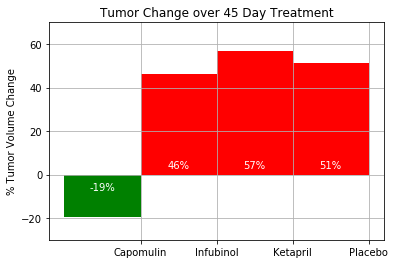

In [14]:
#Splice the data between passing and failing drugs
passing_drugs = percent_change < 0

# Orient widths. Add labels, tick marks, etc. 
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
changes = [(percent_change[drug])for drug in drugs]
summary_graph = plt.bar(drugs,changes,width=-1,align="edge",
                         color=passing_drugs.map({True:"g",False:"r"}))

plt.ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 Day Treatment")
plt.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(summary_graph)
plt.show()